# I_K1 : Inward Rectifier

## 1.0 Setup

In [39]:
# Import packages and constants
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'Python File')))

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from constants import Na_i, K_i, Ca_i, Na_o, K_o, Ca_o, g_BNa, g_BCa, g_BK, R, T, F ,E_K, g_K1

In [40]:
# Add here any state or other calculations that need to be performed before calculating the current

# Create the function to calculate the current
def inward_rectifier_current(V, diabetes, E_K , g_K1, K_o):
    term1 = 48 / (np.exp((V + 37) / 25) + np.exp((V + 37) / -25)) + 10
    term2 = 0.0001 / (1 + np.exp((V - E_K - 76.77) / 17))
    term3 = g_K1 * (V - E_K - 1.73) / (1 + np.exp(1.613 * F * (V - E_K - 1.73) / (R * T))) / (1 + np.exp(K_o - 0.9988 / -0.124))
    return term1 * term2 + term3

## 2.0 Solving

In [41]:
V_range = np.linspace(-60, 60, 100)

### 2.1 Healthy Cell


In [42]:
diabetes = False

# Initialising array to hold the current values 
I_K1_values = []

# Solve for different values of v and calculate I 
for V in V_range:
    I_K1=  inward_rectifier_current(V, diabetes,E_K,g_K1 ,K_o)
    I_K1_values.append(I_K1)

### 2.2 Diabetes

In [43]:
diabetes = True

# Initialising arrays 
I_K1_diabetic_values = []

for V in V_range:
    I_K1=  inward_rectifier_current(V, diabetes,E_K,g_K1 ,K_o)
    I_K1_diabetic_values.append(I_K1)


## 3.0 Plotting

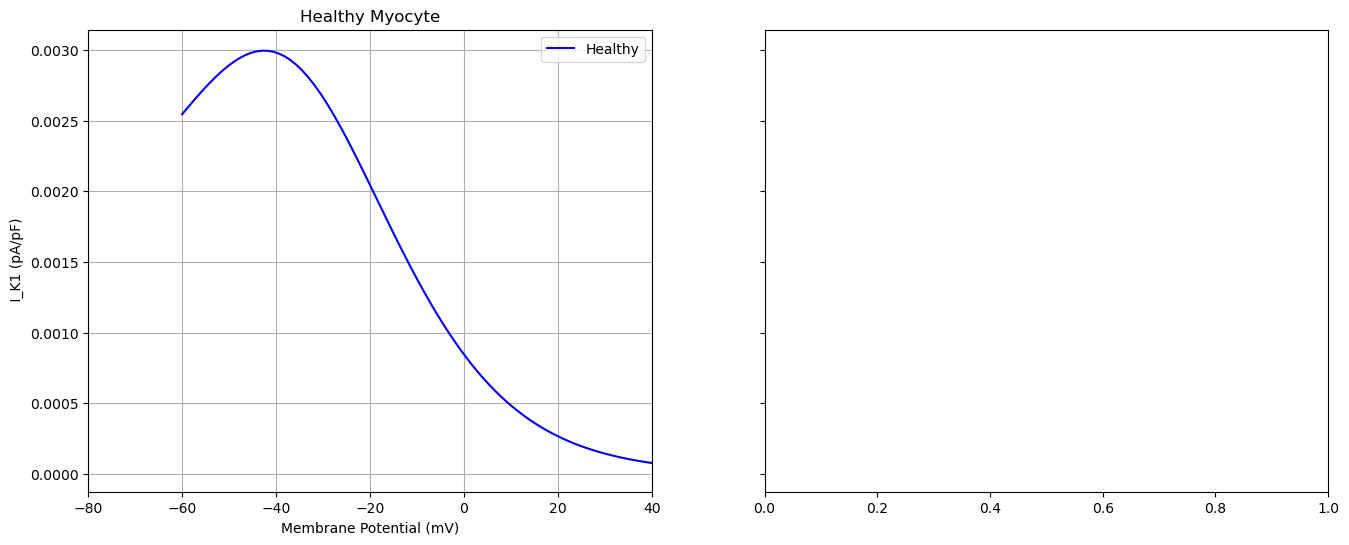

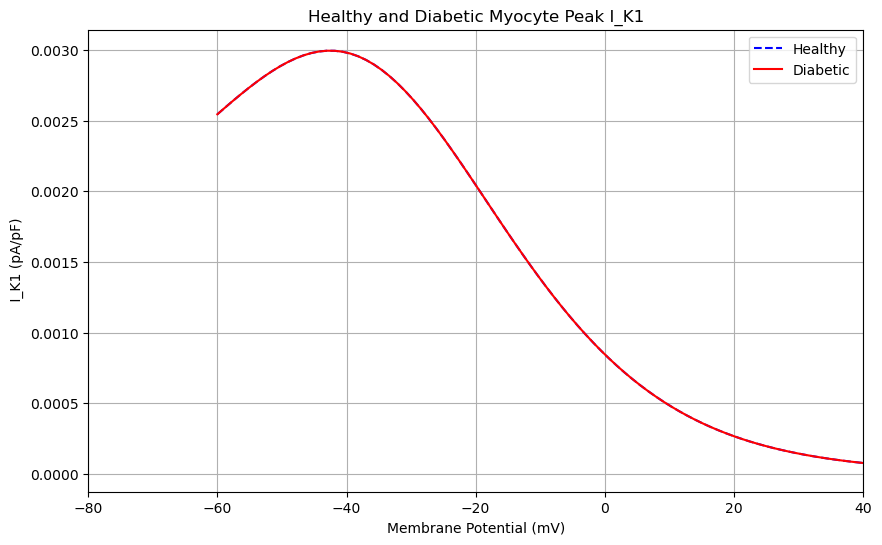

In [44]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Healthy
axs[0].plot(V_range, I_K1_values, label='Healthy', color='blue')
axs[0].set_xlim(-80, 40)
axs[0].set_xlabel('Membrane Potential (mV)')
axs[0].set_ylabel(' I_K1 (pA/pF)')
axs[0].set_title('Healthy Myocyte')
axs[0].legend()
axs[0].grid(True)


# Combines plot
plt.figure(figsize=(10, 6))
plt.plot(V_range, I_K1_values, label='Healthy', color='blue', linestyle='--')
plt.plot(V_range, I_K1_diabetic_values, label='Diabetic', color='red')
plt.xlim(-80, 40)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel(' I_K1 (pA/pF)')
plt.title('Healthy and Diabetic Myocyte Peak I_K1')
plt.legend()
plt.grid(True)
plt.show()